In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
country = "Greece"

In [3]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df.to_csv('global.csv')
df = df[df["Country/Region"] == country]
df = pd.DataFrame(df[df.columns[4:]].sum(),columns=["confirmed"])
df.index = pd.to_datetime(df.index,format='%m/%d/%y')

In [4]:
df

,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2023-03-05,5548487
2023-03-06,5548487
2023-03-07,5548487
2023-03-08,5548487


In [5]:
df.isna().sum()

confirmed    0
dtype: int64

<AxesSubplot:title={'center':'COVID confirmed cases'}>

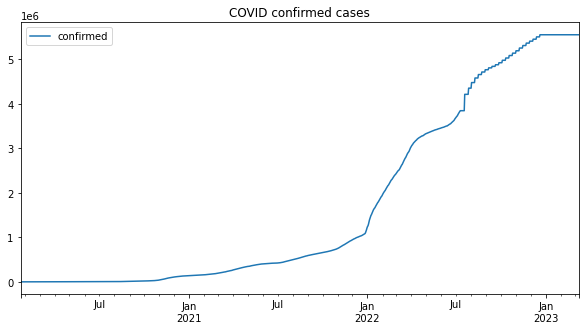

In [6]:
df.plot(figsize=(10,5),title="COVID confirmed cases")



In [7]:
df.tail(50
       )

,confirmed
2023-01-19,5548487
2023-01-20,5548487
2023-01-21,5548487
2023-01-22,5548487
2023-01-23,5548487
2023-01-24,5548487
2023-01-25,5548487
2023-01-26,5548487
2023-01-27,5548487
2023-01-28,5548487


In [8]:
days=len(df)
days

1143

In [9]:
x=days-30
train= df.iloc[:x]
test=df.iloc[x:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(train) 

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
seq_size = 7  ## number of steps (lookback)
n_features = 1 ## number of features. This dataset is univariate so it is 1
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length = seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(train)) 
print("Total number of samples in the generated data = ", len(train_generator)) 


Total number of samples in the original training data =  1113
Total number of samples in the generated data =  1106


In [14]:
x,y = train_generator[10]

In [15]:
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(test)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator)) # 7
#Check data shape from generator
x,y = test_generator[0]

Total number of samples in the original training data =  30
Total number of samples in the generated data =  23


In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

In [17]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 150)            91200     
                                                                 
 lstm_1 (LSTM)               (None, 64)                55040     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit_generator(train_generator, 
                              validation_data=test_generator, 
                              epochs=50, steps_per_epoch=10)

Epoch 1/50


C:\Users\jpolo\AppData\Local\Temp\ipykernel_11676\1194408388.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


10/10 [==============================] - 2s 34ms/step - loss: 0.0873 - val_loss: 0.6409
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0725 - val_loss: 0.4326
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0648 - val_loss: 0.0611
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0142 - val_loss: 0.0984
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0272 - val_loss: 0.0235
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 6.1706e-04
Epoch 9/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 2.3777e-04
Epoch 10/50
10/10 [==============================] - 0s 8ms/step - loss: 7.0663e-04 - val_loss: 0.0012
Epoch 11/50
10/10

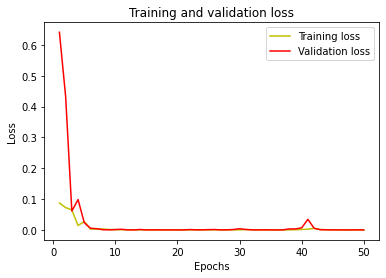

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
#forecast
prediction = [] #Empty list to populate later with predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

In [21]:
future = 7 #Days
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test.index  #Get dates for test data

1/1 [==============================] - 0s 12ms/step


In [22]:
for k in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

<AxesSubplot:title={'center':'Predictions for next 7 days'}>

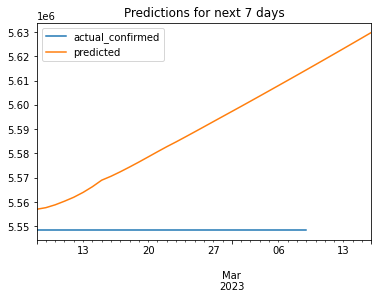

In [23]:
#Create a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["actual_confirmed","predicted"], index=time_series_array)

df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"actual_confirmed"] = test["confirmed"]

#Plot
df_forecast.plot(title="Predictions for next 7 days")

In [24]:
df_forecast

,actual_confirmed,predicted
2023-02-08,5548487.0,5.557057e+06
2023-02-09,5548487.0,5.557720e+06
2023-02-10,5548487.0,5.558893e+06
2023-02-11,5548487.0,5.560375e+06
2023-02-12,5548487.0,5.562005e+06
2023-02-13,5548487.0,5.563993e+06
2023-02-14,5548487.0,5.566326e+06
2023-02-15,5548487.0,5.569015e+06
2023-02-16,5548487.0,5.570626e+06
2023-02-17,5548487.0,5.572471e+06
